# Heart Disease Prediction Based on Personal Key Indicators - (Capstone Project)

### Import Libraries

In [30]:
import numpy as np
import pandas as pd

from matplotlib import pyplot
import seaborn as sns

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm 
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Standardization
from sklearn.preprocessing import StandardScaler 

# train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# Grid Search
from sklearn.model_selection import GridSearchCV

# classification report and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix 

# To save  the model
import pickle


### Load the Data

In [31]:
file_name = 'Data\heart_2020_cleaned.csv'

data = pd.read_csv(file_name)
data.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [32]:
data.shape

(319795, 18)

In [33]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

### Exploratory Data Analysis

In [34]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795,2,No,292422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,319795.0,NaN,NaN,NaN,28.325399,6.3561,12.02,24.03,27.34,31.42,94.85
Smoking,319795,2,No,187887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholDrinking,319795,2,No,298018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,319795,2,No,307726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealth,319795.0,NaN,NaN,NaN,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0
MentalHealth,319795.0,NaN,NaN,NaN,3.898366,7.955235,0.0,0.0,0.0,3.0,30.0
DiffWalking,319795,2,No,275385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,319795,2,Female,167805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCategory,319795,13,65-69,34151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Descriptive Statistics For Numerical Columns
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


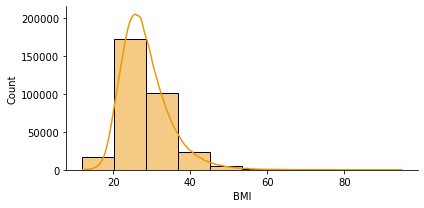

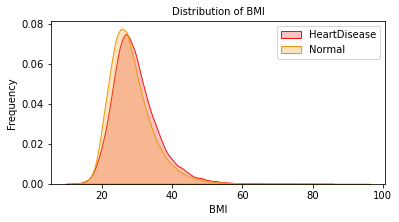

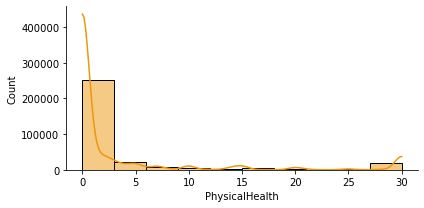

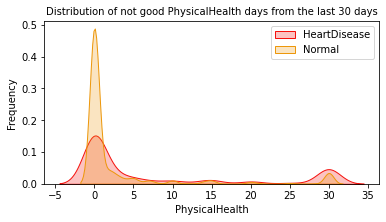

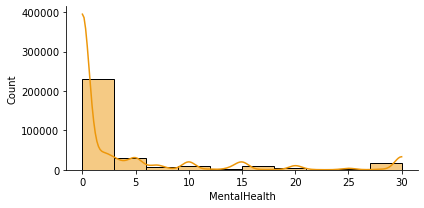

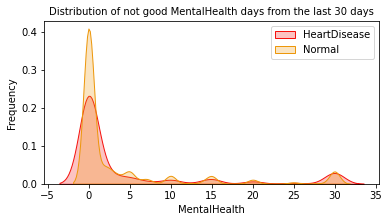

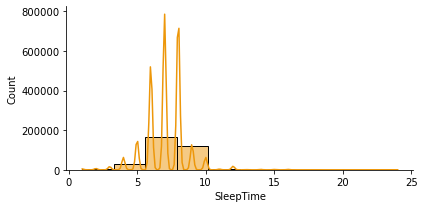

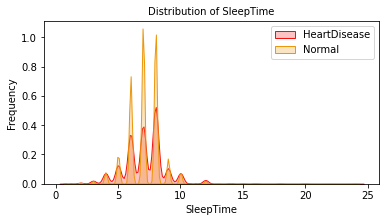

In [36]:
# Distribution of BMI aginst the Number of Heart Disease Occurance
sns.displot(kind='hist', x='BMI', data=data, bins=10, kde=True, aspect=2, height=3,  color='#ED970A')

fig, ax = plt.subplots(figsize = (6,3))
sns.kdeplot(data[data["HeartDisease"]=='Yes']["BMI"], shade = True, color='#F5120E', label="HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]=='No']["BMI"],shade = True, color='#ED970A', label="Normal", ax = ax)
plt.title('Distribution of BMI', fontsize = 10)
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

# Distribution of PhysicalHealth aginst the Number of Heart Disease Occurance
sns.displot(kind='hist', x='PhysicalHealth', data=data, bins=10, kde=True, aspect=2, height=3,  color='#ED970A')

fig, ax = plt.subplots(figsize = (6,3))
sns.kdeplot(data[data["HeartDisease"]=='Yes']["PhysicalHealth"], shade = True, color='#F5120E', label="HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]=='No']["PhysicalHealth"],shade = True, color='#ED970A', label="Normal", ax = ax)
plt.title('Distribution of not good PhysicalHealth days from the last 30 days', fontsize = 10)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

# Distribution of MentalHealth aginst the Number of Heart Disease Occurance
sns.displot(kind='hist', x='MentalHealth', data=data, bins=10, kde=True, aspect=2, height=3,  color='#ED970A')

fig, ax = plt.subplots(figsize = (6,3))
sns.kdeplot(data[data["HeartDisease"]=='Yes']["MentalHealth"], shade = True, color='#F5120E', label="HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]=='No']["MentalHealth"],shade = True, color='#ED970A', label="Normal", ax = ax)
plt.title('Distribution of not good MentalHealth days from the last 30 days', fontsize = 10)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

# Distribution of SleepTime aginst the Number of Heart Disease Occurance
sns.displot(kind='hist', x='SleepTime', data=data, bins=10, kde=True, aspect=2, height=3,  color='#ED970A')

fig, ax = plt.subplots(figsize = (6,3))
sns.kdeplot(data[data["HeartDisease"]=='Yes']["SleepTime"], shade = True, color='#F5120E', label="HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]=='No']["SleepTime"],shade = True, color='#ED970A', label="Normal", ax = ax)
plt.title('Distribution of SleepTime', fontsize = 10)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()




### Exploring Categorical Variables

In [37]:
# get number of unique values
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

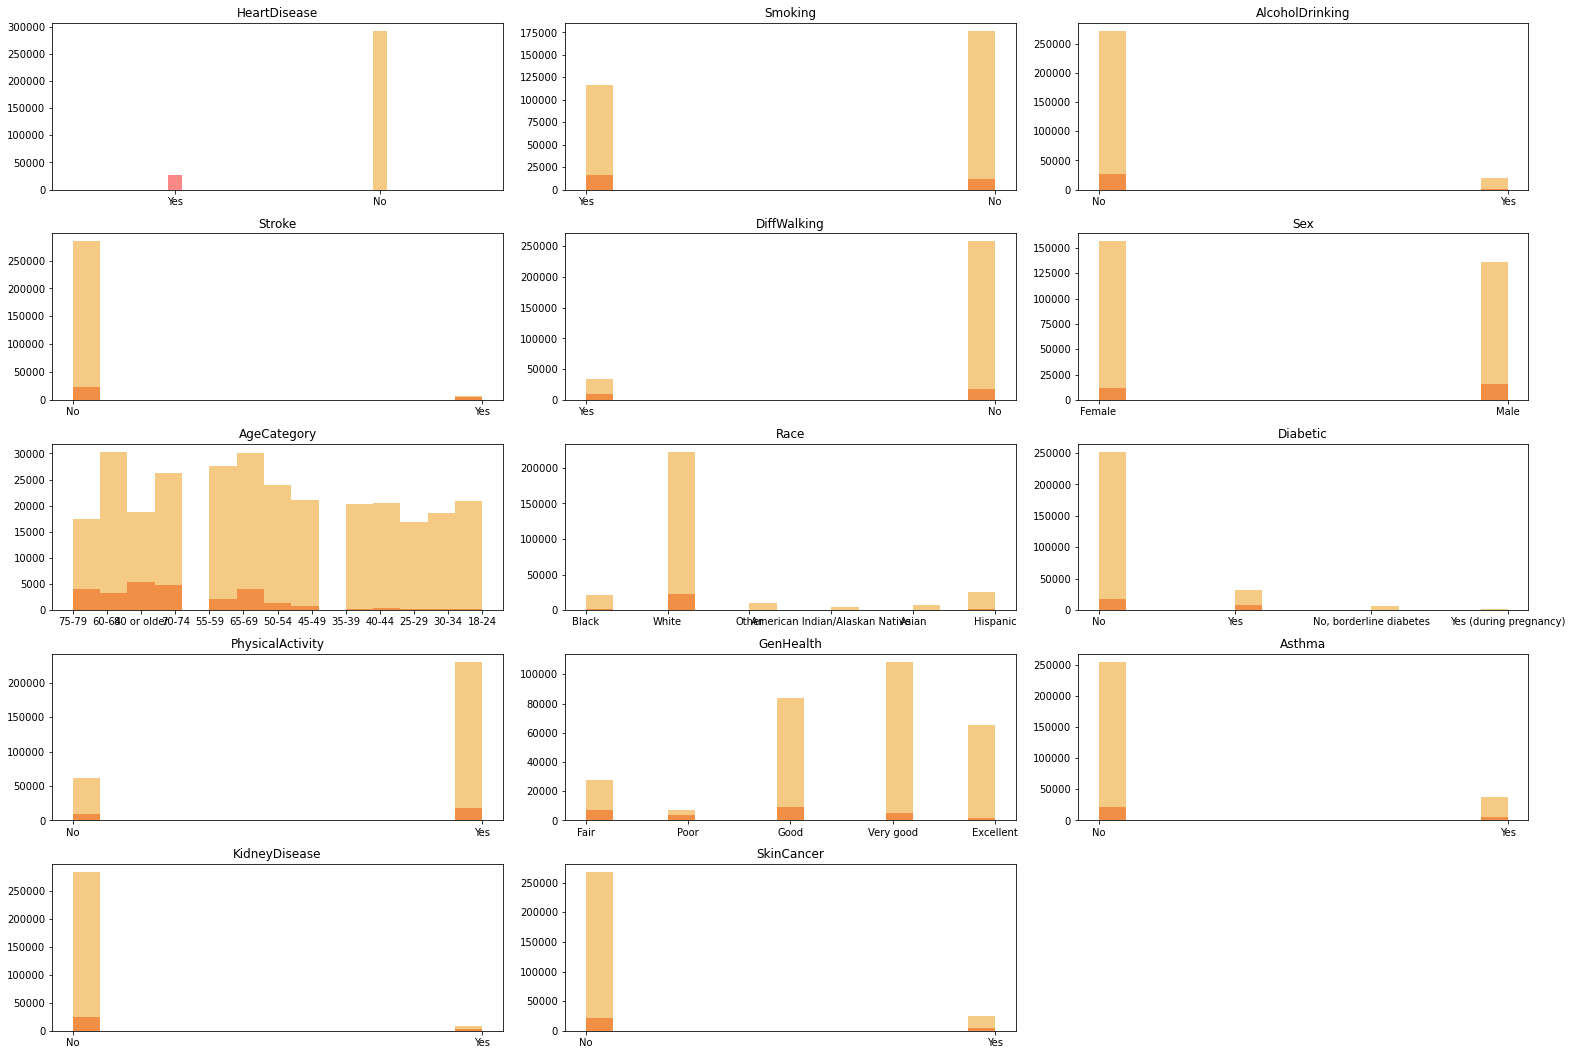

In [38]:
categorical_columns = data.drop(labels=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], axis=1)

fig, ax = plt.subplots(figsize = (22,16))

for i in range(categorical_columns.shape[1]):
    plt.subplot(6,3, i+1)
    f = plt.gca()
    plt.hist(categorical_columns[categorical_columns["HeartDisease"]=='Yes'][categorical_columns.columns[i]], bins=15, alpha=0.5, color='#F5120E', label="HeartDisease")
    plt.hist(categorical_columns[categorical_columns["HeartDisease"]=='No'][categorical_columns.columns[i]], bins=15, alpha=0.5, color='#ED970A', label="Normal")
    f.set_title(categorical_columns.columns[i])

plt.tight_layout(rect=[0, 0.01, 1, 1.1])

In [39]:
# counts (frequencies) of some categorical features
age_values = data['AgeCategory'].value_counts()
age_values

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [40]:
race_values = data['Race'].value_counts()
race_values

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [41]:
# Group by with some numerical features
data.groupby(by='AgeCategory')['BMI'].mean()

AgeCategory
18-24          25.762770
25-29          27.688610
30-34          28.440007
35-39          28.838634
40-44          29.199764
45-49          29.487189
50-54          29.425097
55-59          29.098977
60-64          28.821778
65-69          28.674776
70-74          28.175795
75-79          27.597632
80 or older    26.217710
Name: BMI, dtype: float64

In [42]:
data.groupby(by=['AgeCategory', 'Sex']).agg({'BMI': ['min', 'max', 'mean']})

BMI                  
                      min    max       mean
AgeCategory Sex                            
18-24       Female  14.54  65.96  25.831766
            Male    12.02  83.33  25.706801
25-29       Female  12.92  75.53  27.982342
            Male    12.85  85.91  27.428923
30-34       Female  12.88  86.68  28.609051
            Male    12.08  87.05  28.279624
35-39       Female  12.65  84.08  28.842262
            Male    12.16  94.85  28.834873
40-44       Female  12.40  86.80  29.019845
            Male    13.02  91.55  29.395754
45-49       Female  13.95  75.42  29.290630
            Male    12.88  82.50  29.704347
50-54       Female  12.26  94.66  29.158654
            Male    12.40  83.99  29.720027
55-59       Female  12.02  91.55  28.857727
            Male    12.71  88.60  29.360801
60-64       Female  12.86  75.58  28.528618
            Male    12.13  84.44  29.141462
65-69       Female  12.48  93.86  28.512301
            Male    12.53  72.00  28.856876
70-74       Female  12.40  79.10  27.936085
            Male    12.50  75.76  28.468898
75-79       Female  12.44  67.67  27.344979
            Male    12.20  59.70  27.929083
80 or older Female  12.48  80.06  25.917942
            Male    12.91  88.19  26.685165

### Feature Engineering

In [43]:
# Apply one hot encoding to binary categorical columns
data = data[data.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':0, 'Yes (during pregnancy)':1 })
data.head(8)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,75-79,Black,0,0,Fair,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,70-74,White,0,1,Fair,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,80 or older,White,1,0,Good,9.0,1,0,0


In [44]:
# Apply one hot encoding to other categorical columns
data = data.join(pd.get_dummies(data['AgeCategory'], prefix='AgeCategory'))
data = data.join(pd.get_dummies(data['Race'], prefix='Race'))
data = data.join(pd.get_dummies(data['GenHealth'], prefix='GenHealth'))

In [45]:
# Then dropping the un-necessary categorical columns
data.drop(columns= ['AgeCategory', 'Race', 'GenHealth'], inplace=True)

In [46]:
data.shape

(319795, 39)

In [47]:
# Correlation Matrix and the Heat Map for Numerical Columns
correlation_matrix = data[['HeartDisease','BMI' ,'PhysicalHealth', 'MentalHealth','SleepTime']].corr()
correlation_matrix

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,1.000000,0.051803,0.170721,0.028591,0.008327
BMI,0.051803,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.170721,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.028591,0.064131,0.287987,1.000000,-0.119717
SleepTime,0.008327,-0.051822,-0.061387,-0.119717,1.000000


<AxesSubplot:>

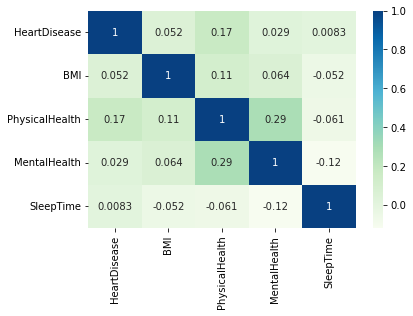

In [48]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'GnBu')

In [49]:
# Standardization of Numerical Data

numerical_columns = ['BMI' ,'PhysicalHealth', 'MentalHealth','SleepTime']
Scaler = StandardScaler()
data[numerical_columns] = Scaler.fit_transform(data[numerical_columns])

In [50]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### Data Pre-process

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   Diabetic                             319795 non-null  int64  
 10  PhysicalActivity                     319795 non-null  int64  
 11  SleepTime    

In [52]:
# Check whether there is any null value contained columns
data.isna().any()

HeartDisease                           False
BMI                                    False
Smoking                                False
AlcoholDrinking                        False
Stroke                                 False
PhysicalHealth                         False
MentalHealth                           False
DiffWalking                            False
Sex                                    False
Diabetic                               False
PhysicalActivity                       False
SleepTime                              False
Asthma                                 False
KidneyDisease                          False
SkinCancer                             False
AgeCategory_18-24                      False
AgeCategory_25-29                      False
AgeCategory_30-34                      False
AgeCategory_35-39                      False
AgeCategory_40-44                      False
AgeCategory_45-49                      False
AgeCategory_50-54                      False
AgeCategor

In [53]:
data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
count,319795.000000,3.197950e+05,319795.000000,319795.000000,319795.000000,3.197950e+05,3.197950e+05,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,-8.982963e-16,0.412477,0.068097,0.037740,8.298850e-15,-7.510435e-15,0.138870,0.475273,0.135590,...,0.025229,0.071730,0.085824,0.034172,0.766779,0.209015,0.108435,0.291215,0.035301,0.356034
std,0.279766,1.000002e+00,0.492281,0.251912,0.190567,1.000002e+00,1.000002e+00,0.345812,0.499389,0.342353,...,0.156819,0.258041,0.280104,0.181671,0.422883,0.406606,0.310930,0.454323,0.184539,0.478826
min,0.000000,-2.565319e+00,0.000000,0.000000,0.000000,-4.240698e-01,-4.900386e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-6.757926e-01,0.000000,0.000000,0.000000,-4.240698e-01,-4.900386e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.550322e-01,0.000000,0.000000,0.000000,-4.240698e-01,-4.900386e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,4.868719e-01,1.000000,0.000000,0.000000,-1.725240e-01,-1.129278e-01,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.046628e+01,1.000000,1.000000,1.000000,3.349118e+00,3.281069e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# get number of unique values
data.nunique()

HeartDisease                              2
BMI                                    3604
Smoking                                   2
AlcoholDrinking                           2
Stroke                                    2
PhysicalHealth                           31
MentalHealth                             31
DiffWalking                               2
Sex                                       2
Diabetic                                  2
PhysicalActivity                          2
SleepTime                                24
Asthma                                    2
KidneyDisease                             2
SkinCancer                                2
AgeCategory_18-24                         2
AgeCategory_25-29                         2
AgeCategory_30-34                         2
AgeCategory_35-39                         2
AgeCategory_40-44                         2
AgeCategory_45-49                         2
AgeCategory_50-54                         2
AgeCategory_55-59               

In [55]:
data['Diabetic'].unique()

array([1, 0], dtype=int64)

In [56]:
data.dtypes

HeartDisease                             int64
BMI                                    float64
Smoking                                  int64
AlcoholDrinking                          int64
Stroke                                   int64
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                              int64
Sex                                      int64
Diabetic                                 int64
PhysicalActivity                         int64
SleepTime                              float64
Asthma                                   int64
KidneyDisease                            int64
SkinCancer                               int64
AgeCategory_18-24                        uint8
AgeCategory_25-29                        uint8
AgeCategory_30-34                        uint8
AgeCategory_35-39                        uint8
AgeCategory_40-44                        uint8
AgeCategory_45-49                        uint8
AgeCategory_5

In [57]:
# Re-assign data types of binary columnsfor the memory optimization 
data['Diabetic'] = data['Diabetic'].astype('int8')
data['HeartDisease'] = data['HeartDisease'].astype('int8')
data['Smoking'] = data['Smoking'].astype('int8')
data['AlcoholDrinking'] = data['AlcoholDrinking'].astype('int8')
data['Stroke'] = data['Stroke'].astype('int8')
data['DiffWalking'] = data['DiffWalking'].astype('int8')
data['Sex'] = data['Sex'].astype('int8')
data['PhysicalActivity'] = data['PhysicalActivity'].astype('int8')
data['Asthma'] = data['Asthma'].astype('int8')
data['KidneyDisease'] = data['KidneyDisease'].astype('int8')
data['SkinCancer'] = data['SkinCancer'].astype('int8')


In [58]:
data.dtypes

HeartDisease                              int8
BMI                                    float64
Smoking                                   int8
AlcoholDrinking                           int8
Stroke                                    int8
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                               int8
Sex                                       int8
Diabetic                                  int8
PhysicalActivity                          int8
SleepTime                              float64
Asthma                                    int8
KidneyDisease                             int8
SkinCancer                                int8
AgeCategory_18-24                        uint8
AgeCategory_25-29                        uint8
AgeCategory_30-34                        uint8
AgeCategory_35-39                        uint8
AgeCategory_40-44                        uint8
AgeCategory_45-49                        uint8
AgeCategory_5

### X and y variable selection

In [59]:
X = data.drop(columns=['HeartDisease'], axis = 1)
y = data['HeartDisease']


In [60]:
X.shape
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,-1.844750,1,0,0,-0.046751,3.281069,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,-1.256338,0,0,1,-0.424070,-0.490039,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,-0.274603,1,0,0,2.091388,3.281069,0,1,1,1,...,0,0,0,0,1,0,1,0,0,0
3,-0.647473,0,0,0,-0.424070,-0.490039,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-0.726138,0,0,0,3.097572,-0.490039,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### Data Pre-processing Function

In [61]:
def pre_processing(data):
    # Apply one hot encoding to binary categorical columns
    data = data[data.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':0, 'Yes (during pregnancy)':1 })
    
    # Apply one hot encoding to other categorical columns
    data = data.join(pd.get_dummies(data['GenHealth'], prefix='GenHealth'))
    data = data.join(pd.get_dummies(data['AgeCategory'], prefix='AgeCategory'))
    data = data.join(pd.get_dummies(data['Race'], prefix='Race'))

    # Then dropping the un-necessary categorical columns
    data.drop(columns= ['AgeCategory', 'Race', 'GenHealth'], inplace=True)

    # Standardization of numerical columns
    numerical_columns = ['BMI' ,'PhysicalHealth', 'MentalHealth','SleepTime']
    Scaler = StandardScaler()
    data[numerical_columns] = Scaler.fit_transform(data[numerical_columns])

    # Re-assign data types of binary columnsfor the memory optimization 
    data['Diabetic'] = data['Diabetic'].astype('int8')
    data['HeartDisease'] = data['HeartDisease'].astype('int8')
    data['Smoking'] = data['Smoking'].astype('int8')
    data['AlcoholDrinking'] = data['AlcoholDrinking'].astype('int8')
    data['Stroke'] = data['Stroke'].astype('int8')
    data['DiffWalking'] = data['DiffWalking'].astype('int8')
    data['Sex'] = data['Sex'].astype('int8')
    data['PhysicalActivity'] = data['PhysicalActivity'].astype('int8')
    data['Asthma'] = data['Asthma'].astype('int8')
    data['KidneyDisease'] = data['KidneyDisease'].astype('int8')
    data['SkinCancer'] = data['SkinCancer'].astype('int8')

    # X variable selection
    X_variables = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older', 'Race_American Indian/Alaskan Native', 'Race_Asian'
, 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good']
    # Assign 0 to missing columns
    for x in list(set(X_variables) - set(data.columns)):
        data[x] = 0
    
    return data[X_variables]

### Train, Test and Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 223856
Test sample size  = 95939


In [63]:
X_test
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
303145,-1.229592,0,0,0,0.079022,-0.490039,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
61634,0.392474,0,0,0,-0.424070,-0.490039,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
117690,0.878622,0,0,0,-0.424070,-0.490039,0,1,1,1,...,0,0,0,0,1,0,0,1,0,0
132104,-1.059676,1,0,0,-0.424070,-0.490039,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
262165,-0.405186,0,0,0,-0.424070,-0.490039,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.208399,0,0,0,-0.424070,-0.490039,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
259178,2.245815,1,0,0,-0.424070,0.138479,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
131932,0.450686,1,0,0,1.085205,0.264183,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
146867,-0.957412,0,0,0,0.456341,0.138479,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


### Model Training Function

In [64]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [65]:
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted') 
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  })

### Training the Models

In [66]:
model0 = model_train(RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=3, verbose=1), 'rf_0', X_train, y_train, X_test, y_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished


In [67]:
model0

{'model_name': 'rf_0',
 'model': RandomForestClassifier(max_depth=10, n_jobs=3, verbose=1),
 'accuracy': 0.9144977537810484,
 'precision': 0.6147757255936676,
 'f1_score': 0.8773307050171817,
 'roc_auc': 0.8275757142195951}

### Training with different models and hyperparameters

In [68]:
models = []
models.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(max_depth=None,min_samples_leaf=2, min_samples_split=2), 'dt1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=1), 'rf2', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf3', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=3, verbose=1), 'rf4', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   19.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    9.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   18.7s
[Parallel(n_jobs=3)]

,model_name,model,accuracy,precision,f1_score,roc_auc
0,lgr1,"LogisticRegression(n_jobs=3, verbose=1)",0.914477,0.526646,0.887088,0.837163
1,dt1,DecisionTreeClassifier(min_samples_leaf=2),0.886292,0.280248,0.877738,0.613792
2,rf1,"(DecisionTreeClassifier(max_features='auto', r...",0.903585,0.342520,0.882696,0.783376
3,rf2,"(DecisionTreeClassifier(max_features='auto', r...",0.903856,0.342867,0.882571,0.791200
4,rf3,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.914717,0.638462,0.877746,0.828191
5,rf4,"(DecisionTreeClassifier(max_depth=20, max_feat...",0.914425,0.532103,0.884472,0.831325


### Grid Search

In [69]:
parameters = {'n_estimators': [100,500], 'max_depth': [None, 10, 20]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
gs_model.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 500]},
             pre_dispatch=2, verbose=3)

In [70]:
# Best Model Paramaters
print(gs_model.best_params_) 

{'max_depth': 10, 'n_estimators': 100}


In [71]:
y_pred = gs_model.predict(X_test)

print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     87649
           1       0.63      0.03      0.06      8290

    accuracy                           0.91     95939
   macro avg       0.77      0.51      0.51     95939
weighted avg       0.89      0.91      0.88     95939

[[87508   141]
 [ 8046   244]]


### Select the Best Model

In [72]:
# Select best model 
model = models.query("model_name=='rf3'")
model 

,model_name,model,accuracy,precision,f1_score,roc_auc
4,rf3,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.914717,0.638462,0.877746,0.828191


In [73]:
model = model['model'].values[0]
model

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=3, verbose=1)

### Saving the Best Model

In [75]:
save_file = 'model_rf3_best.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [76]:
model_ = pickle.load(open(save_file, 'rb'))
model_

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=3, verbose=1)

### Predict on Sample Data

In [4]:
sample_input = data[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']].sample(1)
sample_input

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
308886,30.13,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Very good,7.0,No,No,No


In [5]:
input_data = sample_input.to_dict(orient='records')[0]
input_data

{'HeartDisease': 'No',
 'BMI': 20.37,
 'Smoking': 'No',
 'AlcoholDrinking': 'No',
 'Stroke': 'No',
 'PhysicalHealth': 0.0,
 'MentalHealth': 2.0,
 'DiffWalking': 'No',
 'Sex': 'Female',
 'AgeCategory': '40-44',
 'Race': 'White',
 'Diabetic': 'No',
 'PhysicalActivity': 'Yes',
 'GenHealth': 'Excellent',
 'SleepTime': 7.0,
 'Asthma': 'No',
 'KidneyDisease': 'No',
 'SkinCancer': 'No'}

In [5]:
sample_input.shape

(200, 18)

In [8]:
pre_processing(sample_input)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
313446,-1.186880,1,0,0,-0.404562,-0.502508,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
160887,0.100874,1,0,0,-0.404562,-0.502508,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
37791,-0.033755,0,0,0,-0.404562,0.010255,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
319451,-1.483454,0,0,0,-0.404562,-0.502508,0,1,1,1,...,0,1,0,0,0,0,0,1,0,0
131268,-0.638609,1,0,0,-0.404562,0.266637,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270856,1.349605,1,0,0,1.500982,-0.502508,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
133086,1.868609,0,0,0,-0.404562,-0.246126,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
82492,-0.336182,1,0,0,-0.404562,-0.502508,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
278860,-0.224967,0,0,0,-0.404562,-0.117936,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
model = pickle.load(open('model_rf3_best.pickle', 'rb'))
model.predict_proba(pre_processing(sample_input))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([[0.97379636, 0.02620364],
       [0.91454934, 0.08545066],
       [0.98021343, 0.01978657],
       [0.91327182, 0.08672818],
       [0.94705658, 0.05294342],
       [0.96443657, 0.03556343],
       [0.94565182, 0.05434818],
       [0.94575967, 0.05424033],
       [0.9755924 , 0.0244076 ],
       [0.97202999, 0.02797001],
       [0.93839137, 0.06160863],
       [0.98405406, 0.01594594],
       [0.70769315, 0.29230685],
       [0.93165966, 0.06834034],
       [0.98827675, 0.01172325],
       [0.97313616, 0.02686384],
       [0.98430517, 0.01569483],
       [0.97553671, 0.02446329],
       [0.97123003, 0.02876997],
       [0.97900318, 0.02099682],
       [0.96492968, 0.03507032],
       [0.94022491, 0.05977509],
       [0.9784732 , 0.0215268 ],
       [0.97872734, 0.02127266],
       [0.97683613, 0.02316387],
       [0.98083969, 0.01916031],
       [0.97847891, 0.02152109],
       [0.97921099, 0.02078901],
       [0.97858632, 0.02141368],
       [0.87816188, 0.12183812],
       [0.

### Score Function

In [6]:
def score(input_data, model):
    return model.predict_proba(input_data)

In [12]:
prediction = score(input_data=pre_processing(sample_input), model=model)
prediction

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([[0.97379636, 0.02620364],
       [0.91454934, 0.08545066],
       [0.98021343, 0.01978657],
       [0.91327182, 0.08672818],
       [0.94705658, 0.05294342],
       [0.96443657, 0.03556343],
       [0.94565182, 0.05434818],
       [0.94575967, 0.05424033],
       [0.9755924 , 0.0244076 ],
       [0.97202999, 0.02797001],
       [0.93839137, 0.06160863],
       [0.98405406, 0.01594594],
       [0.70769315, 0.29230685],
       [0.93165966, 0.06834034],
       [0.98827675, 0.01172325],
       [0.97313616, 0.02686384],
       [0.98430517, 0.01569483],
       [0.97553671, 0.02446329],
       [0.97123003, 0.02876997],
       [0.97900318, 0.02099682],
       [0.96492968, 0.03507032],
       [0.94022491, 0.05977509],
       [0.9784732 , 0.0215268 ],
       [0.97872734, 0.02127266],
       [0.97683613, 0.02316387],
       [0.98083969, 0.01916031],
       [0.97847891, 0.02152109],
       [0.97921099, 0.02078901],
       [0.97858632, 0.02141368],
       [0.87816188, 0.12183812],
       [0.

### Post-processing Function for Prediction

In [7]:
def post_processing(prediction):
    if len(prediction)==1:
        return prediction[:, 1][0]
    else:
        return prediction[:, 1]

In [14]:
output = post_processing(score(input_data=pre_processing(sample_input), model=model))
output

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([0.02620364, 0.08545066, 0.01978657, 0.08672818, 0.05294342,
       0.03556343, 0.05434818, 0.05424033, 0.0244076 , 0.02797001,
       0.06160863, 0.01594594, 0.29230685, 0.06834034, 0.01172325,
       0.02686384, 0.01569483, 0.02446329, 0.02876997, 0.02099682,
       0.03507032, 0.05977509, 0.0215268 , 0.02127266, 0.02316387,
       0.01916031, 0.02152109, 0.02078901, 0.02141368, 0.12183812,
       0.06791954, 0.02096365, 0.04387202, 0.04530915, 0.06070002,
       0.02432571, 0.01795867, 0.08249398, 0.05252414, 0.07793139,
       0.01665485, 0.06519788, 0.09496743, 0.03147565, 0.04309552,
       0.02896331, 0.02271614, 0.03346081, 0.03276634, 0.026292  ,
       0.01934128, 0.19502284, 0.10526225, 0.0333423 , 0.01676443,
       0.02265428, 0.13105604, 0.01579034, 0.34231915, 0.01926758,
       0.05382882, 0.03111064, 0.04653927, 0.03524346, 0.06169749,
       0.12036071, 0.01760044, 0.07544021, 0.06786037, 0.19757218,
       0.05398714, 0.02004822, 0.02624016, 0.04330338, 0.02607

In [15]:
# Create new column in input dataset
sample_input['prediction'] = post_processing(model.predict_proba(pre_processing(sample_input)))
sample_input

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,prediction
313446,No,21.46,Yes,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,8.0,No,No,No,0.026204
160887,No,28.06,Yes,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Very good,8.0,No,No,No,0.085451
37791,No,27.37,No,No,No,0.0,4.0,No,Male,18-24,White,No,Yes,Excellent,8.0,No,No,No,0.019787
319451,No,19.94,No,No,No,0.0,0.0,No,Male,70-74,Hispanic,Yes,Yes,Excellent,8.0,No,No,No,0.086728
131268,No,24.27,Yes,No,No,0.0,6.0,No,Female,65-69,White,Yes,Yes,Very good,6.0,No,No,No,0.052943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270856,No,34.46,Yes,No,No,13.0,0.0,No,Female,35-39,White,No,Yes,Very good,8.0,No,No,No,0.040858
133086,No,37.12,No,No,No,0.0,2.0,No,Female,35-39,Black,No,No,Good,5.0,No,No,No,0.057299
82492,No,25.82,Yes,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Excellent,8.0,No,No,No,0.024529
278860,No,26.39,No,No,No,0.0,3.0,No,Male,55-59,White,No,Yes,Poor,8.0,No,No,No,0.114085


In [12]:
# Output value
sample_output = post_processing(score(input_data=pre_processing(sample_input), model=model))
sample_output

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([0.04911054, 0.06528054, 0.08519614, 0.12670938, 0.05310556,
       0.19562279, 0.06666334, 0.18754947, 0.02134253, 0.08535296,
       0.07695658, 0.0685043 , 0.0210879 , 0.09414185, 0.02413045,
       0.09818399, 0.09886347, 0.01971032, 0.02848549, 0.11669962,
       0.01923219, 0.03060609, 0.07693061, 0.0681331 , 0.05766707,
       0.03216926, 0.10129555, 0.02069858, 0.01954377, 0.01907751,
       0.06555827, 0.03083362, 0.02001358, 0.02502892, 0.27352524,
       0.08733148, 0.02610389, 0.02040266, 0.10402532, 0.06460069,
       0.08918763, 0.04395061, 0.04668347, 0.06386201, 0.02682973,
       0.05081617, 0.02318522, 0.19519259, 0.33541365, 0.02883225,
       0.15491493, 0.02031593, 0.0234943 , 0.02379544, 0.04470774,
       0.0259718 , 0.02838723, 0.09491882, 0.10351744, 0.2089184 ,
       0.02641719, 0.04944029, 0.17012145, 0.11160044, 0.03441891,
       0.03325057, 0.02604714, 0.03095352, 0.03111858, 0.11959663,
       0.10243385, 0.02813578, 0.05913933, 0.08288736, 0.02490

### Inference Pipeline

In [28]:
def app_prediction_function(input_data, model):
    likelihood = post_processing(score(input_data=pre_processing(input_data), model=model))
    perc = ' %' 
    likelihood_as_perc = str(likelihood*100) + perc
    return likelihood_as_perc

In [29]:
input_data = data[['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']].sample(1)
print(input_data)
app_prediction_function(input_data, model)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
223851           No  34.28     Yes              No    Yes            30.0   

        MentalHealth DiffWalking     Sex AgeCategory   Race Diabetic  \
223851          10.0         Yes  Female       60-64  White      Yes   

       PhysicalActivity GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
223851               No      Fair        4.0    Yes            No         No  


E:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


'39.99395049289734 %'